# # 1 k-NN implementation

First I imported essential bult-in library

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter

Part (i) Read in the data into Python from the dataset:

In [117]:
Employee = pd.read_excel("Employee.xlsx")
data = pd.DataFrame(Employee)

Here is data information which read whith pandas

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


#Part (ii) Plot the histogram or barchart to represent the dataset containing label and features.

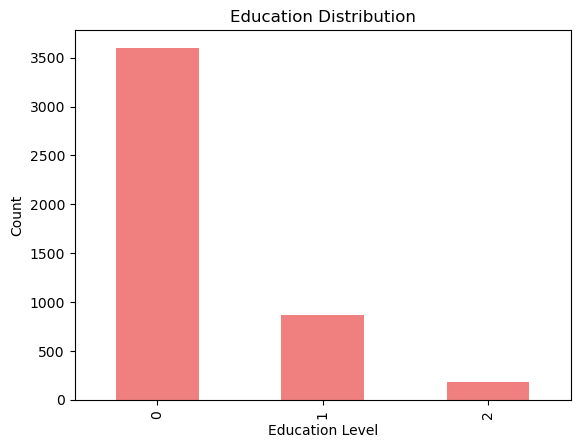

In [77]:
# Plot a bar chart for the 'education' feature
education_counts = data['Education'].value_counts()
education_counts.plot(kind='bar', color='lightcoral')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Distribution')
plt.show()

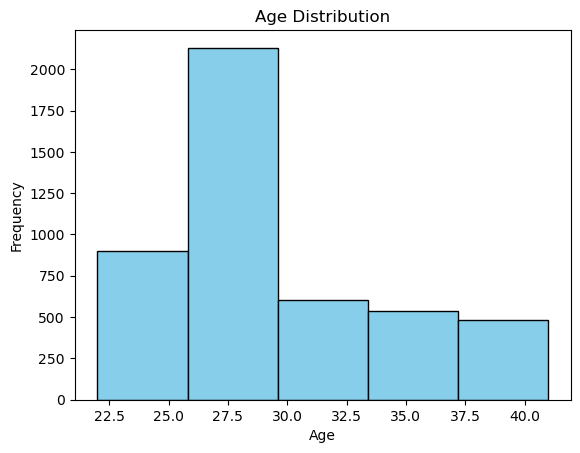

In [29]:
# Plot a histogram for the 'age' feature
plt.hist(data['Age'], bins=5, edgecolor='k', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

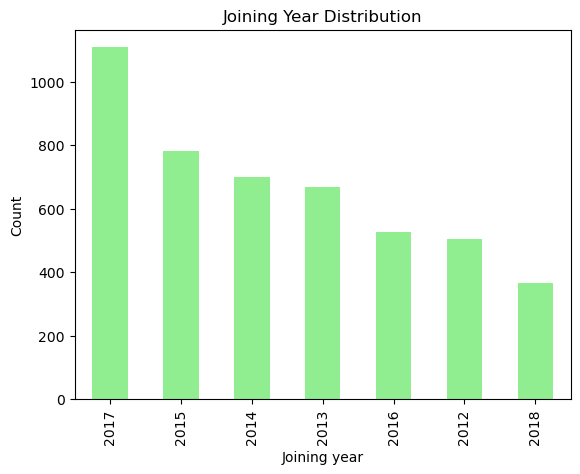

In [30]:
#plot a bar chart for JoiningYear 
joining_year_counts = data["JoiningYear"].value_counts()
joining_year_counts.plot(kind="bar", color='lightgreen')
plt.xlabel('Joining year')
plt.ylabel('Count')
plt.title('Joining Year Distribution')
plt.show()

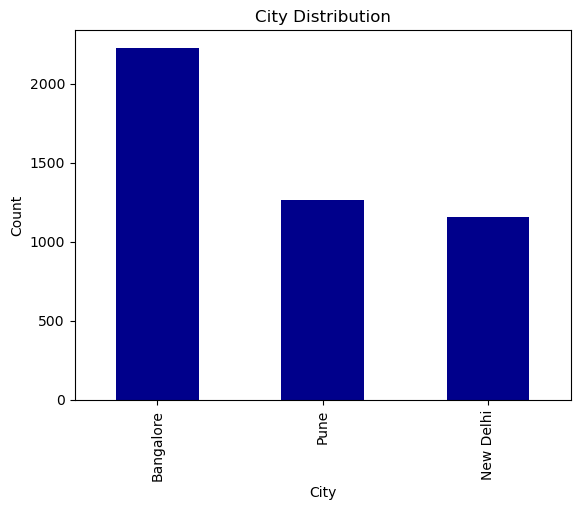

In [31]:

#plot a bar chart for City 
city_counts = data["City"].value_counts()
city_counts.plot(kind="bar", color='darkblue')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('City Distribution')
plt.show()

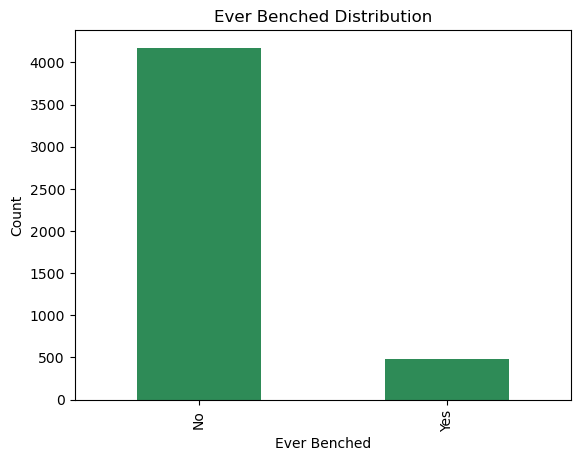

In [38]:
# Plot a bar chart for the 'EverBenched' feature
education_counts = data['EverBenched'].value_counts()
education_counts.plot(kind='bar', color='seagreen')
plt.xlabel('Ever Benched')
plt.ylabel('Count')
plt.title('Ever Benched Distribution')
plt.show()

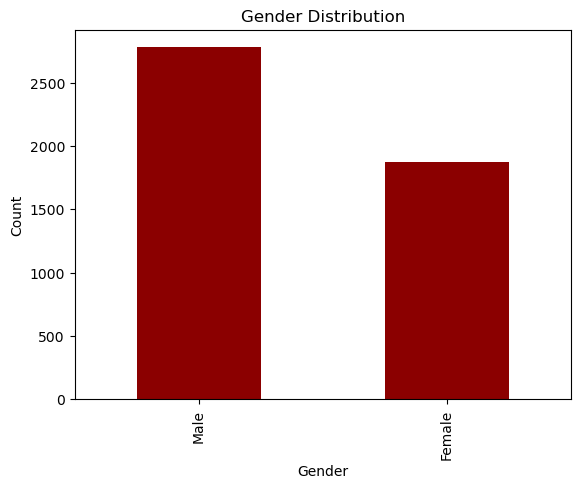

In [32]:
#plot a bar chart for Gender 
gender_counts = data["Gender"].value_counts()
gender_counts.plot(kind="bar", color='darkred')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

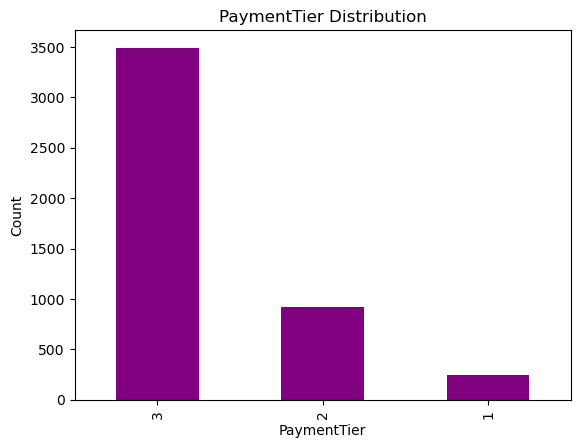

In [79]:
#plot a bar chart for PaymentTier 
PaymentTier_counts = data["PaymentTier"].value_counts()
PaymentTier_counts.plot(kind="bar", color='purple')
plt.xlabel('PaymentTier')
plt.ylabel('Count')
plt.title('PaymentTier Distribution')
plt.show()

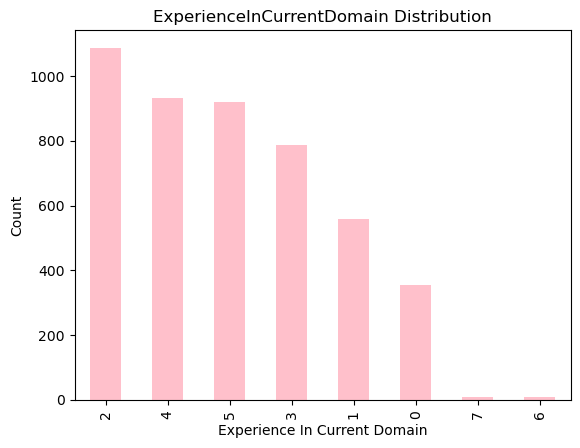

In [82]:
#plot a bar chart for PaymentTier 
ExperienceInCurrentDomain_counts = data["ExperienceInCurrentDomain"].value_counts()
ExperienceInCurrentDomain_counts.plot(kind="bar", color='pink')
plt.xlabel('Experience In Current Domain')
plt.ylabel('Count')
plt.title('ExperienceInCurrentDomain Distribution')
plt.show()

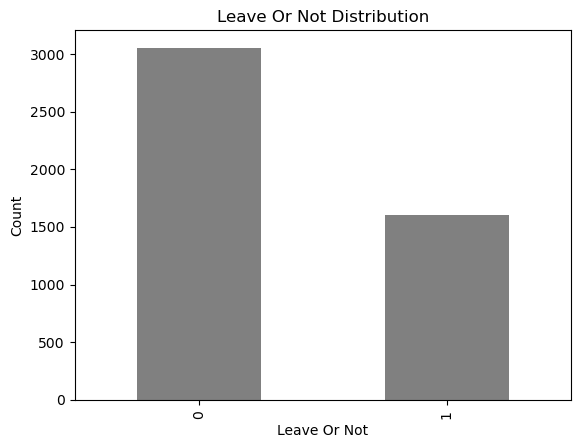

In [84]:
#plot a bar chart for PaymentTier 
LeaveOrNot_counts = data["LeaveOrNot"].value_counts()
LeaveOrNot_counts.plot(kind="bar", color='gray')
plt.xlabel('Leave Or Not')
plt.ylabel('Count')
plt.title('Leave Or Not Distribution')
plt.show()

# pre-processing data

Part (iv) Train a 1-nearest neighbor classifier using the training data and predict the labels in the
testing data. What is the test error (the empirical error rate on the test set)?

First of all becouse dataset is contain non numeric data column, need to be changed to all numeric values. To mapping numeric value to string values in features: Gender, Education and Everbenched i provided some mapping dictionary and map them to dataset. I also decided to remove the City feature couse i did'nt know how to provide a numeric values for cities.

In [118]:
# Define function to : Iterate through the text column and apply the mapping
def text_mapping_to_num(mapping, data_row, data, default_value):
    for index, row in data.iterrows():
        text_value = row[data_row]
        if text_value in mapping:
            data.at[index, data_row] = mapping[text_value]
            
# Define a mapping for gender and everbenched values
default_value = -1
gender_mapping = {'Male': 0, 'Female': 1}
everbenched_mapping = {'No': 0, 'Yes': 1}
education_mapping = {'Bachelors': 0, 'Masters': 1, 'PHD': 2}

text_mapping_to_num(gender_mapping, 'Gender', data, default_value)
text_mapping_to_num(everbenched_mapping, 'EverBenched', data, default_value)
text_mapping_to_num(education_mapping, 'Education', data, default_value)
# Omit the 'City' column
data = data.drop(columns=['City'])

# Now, the 'gender' column contains numerical values
data

,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,3,34,0,0,0,0
1,0,2013,1,28,1,0,3,1
2,0,2014,3,38,1,0,2,0
3,1,2016,3,27,0,0,5,1
4,1,2017,3,24,0,1,2,1
...,...,...,...,...,...,...,...,...
4648,0,2013,3,26,1,0,4,0
4649,1,2013,2,37,0,0,2,1
4650,1,2018,3,27,0,0,5,1
4651,0,2012,3,30,0,1,2,0


# Split data to test and trainig sets

Part (iii) Randomly split the data into,
- Training data (80% of the entire data set)
- Test data (20%)

Split tada into train and test:
train_percentage represents percentage of training data compare to all dataset, to use numpy shuffle method, first i convert pandas data fram into an array, then calculate the number of training and test sets according to train percentage (80%)
then shuffle data and then from X and y array, i slice shuffled 

For label data which need to be predicted for Test data I choose the Last feature: "LeaveOrNot" which represents our "y", and take features 0 to 6: Education, JoiningYear, PaymentTier, Age, Gender, EverBenched, ExperienceInCurrentDomain

In [104]:
#identify X and y
X = data.iloc[:, 0:6]
y = data.iloc[:, -1]

In [105]:
# Define the percentage of data to use for training (80%)
train_percentage = 0.8

# Convert the DataFrame to an array to use shuffle method
data_array = data.values

# Calculate the number of samples for training and testing
samples = len(data_array)
train_data_counts = int(train_percentage * samples)
test_data_counts = samples - train_data_counts

# Shuffle the data array randomly
np.random.shuffle(data_array)
X_array = X.values
y_array = y.values

# Calculate X_train, X_test, y_train, y_test
X_train = X_array[:train_data_counts]
X_test = X_array[train_data_counts:]
y_train = y_array[:train_data_counts]
y_test = y_array[train_data_counts:]

print("Training X Data:")
print("X: ", len(X_train), X_train)
print("\nTesting X Data:")
print("X: ", len(X_test), X_test)

Training X Data:
X:  3722 [[0 2017 3 34 0 0]
 [0 2013 1 28 1 0]
 [0 2014 3 38 1 0]
 ...
 [0 2015 2 36 1 0]
 [1 2015 3 36 0 0]
 [1 2014 3 32 1 0]]

Testing X Data:
X:  931 [[0 2018 2 37 1 0]
 [0 2018 3 35 1 0]
 [0 2015 1 36 1 0]
 ...
 [1 2018 3 27 0 0]
 [0 2012 3 30 0 1]
 [0 2015 3 33 0 1]]


To compute multi dimentinal ditances between two points in a multi dimention space we can use euclidean distance which calculate like: square of sum of powe 2 of diffrencess between each test point feature value with train value point:

In [106]:
#Define a function to compute euclidean distance of two points
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

Here is a function which calculate distances between each test point and every trainig points:

In [107]:
#Create KNN classifier
def KNN_classifier(test_point, training_data):
    distances = []
    for x_train in training_data:
        distances.append(euclidean_distance(test_point, x_train))
    return distances

Then I pass distancess for each test point to prediction function To calculate k nearest points for each test point,
k_indices in code below provides ascending order of the distances for each test point and choose kth first smallest point which represents k nearest points to current test point, by having this informations we can have k nearest labels among training points and among them we choose the y which have the most majority among all y (which we have k number of them) we provided earlier.
then this value would be our predicted label for current test point and then we appended the value into predictions list and finally return the predictions list as predicted labels.

In [109]:
#Define prediction functiom
def prediction(X_test, X_train, y_train, k=1):
    predictions = []
    for x in X_test:
        k_nearest_labels = []
        distances = KNN_classifier(x, X_train)
        #get the closest k
        k_indices = np.argsort(distances)[:k]
        for i in k_indices:
            k_nearest_labels.append(y_train[i])
            
        # majority vote
        most_common = Counter(k_nearest_labels).most_common()
        predictions.append(most_common[0][0])
    
    return predictions

# # 1-nearest-neighbors --> k=1

In code below our prediction function provide us 1-nearest labels :

In [110]:
predictions  = prediction(X_test, X_train, y_train, 1)
print(predictions)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 

As you can see below 261 numbers of labels predicted wrong compare to its orginal value (y_test) and error rate is approximately 28%

In [111]:
#Calculate test error and test rate for k=1
number_of_error = np.sum(predictions != y_test)
#Calculate error rate
error_rate = number_of_error / len(y_test)
print("Number of Errors: ",number_of_error)
print("Error rate : ", error_rate)

Number of Errors:  261
Error rate :  0.280343716433942


# # calculate nearest neighbor for K = {1, 3, 5, 7, 9, 11}

In [114]:
k_values = [1,3,5,7,9,11,13]
test_errors = {}
for k in k_values:
    # Make predictions on the test set for each k
    predictions  = prediction(X_test, X_train, y_train, k)
    number_of_error = np.sum(predictions != y_test)
    # Calculate the test error 
    test_error = number_of_error / len(y_test)
    # Store the test error for this k
    test_errors[k] = test_error
    
for k, error in test_errors.items():
    print(f"k={k}: Test Error={error}")

k=1: Test Error=0.280343716433942
k=3: Test Error=0.22341568206229862
k=5: Test Error=0.22448979591836735
k=7: Test Error=0.20408163265306123
k=9: Test Error=0.2083780880773362
k=11: Test Error=0.21482277121374865
k=13: Test Error=0.21160042964554243


I prefer to choose k = 7 becouse it's error is less than others.

# # Compute the error rate of the classifier for the optimal value of k on the validation set

In [122]:
# Define the ratios for training, validation, and test sets
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

# Calculate the number of samples for each set
total_counts = len(data)
train_counts = int(total_samples * train_ratio)
validation_counts = int(total_samples * validation_ratio)

# Shuffle the data array randomly
np.random.shuffle(data_array)
X_array = X.values
y_array = y.values

# Calculate X_train, X_test, y_train, y_test
X_train = X_array[:train_counts]
X_validation = X_array[train_counts:train_counts + validation_counts]
y_train = y_array[:train_data_counts]
y_validation = y_array[train_counts:train_counts + validation_counts]

In [123]:
predictions  = prediction(X_validation, X_train, y_train, 7)
print(predictions)

[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

# # calculate error rate for optimal k on validation set

In [128]:
# Make predictions on the test set for k = 7
number_of_error = np.sum(predictions != y_validation)
# Calculate the test error 
test_error = number_of_error / len(y_validation)

print("Error rate: k = 7 : ", test_error)

Error rate: k = 7 :  0.289247311827957
